Importing all the important libraries to work with

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing the dataset

In [2]:
data = pd.read_csv("WineQT.csv")
print("Data imported")

Data imported


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Gathering info on data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
print(data.shape)

(1143, 13)


In [6]:
data.describe().style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Finding Null Values

In [7]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


The corr() function generates a square matrix where the rows and columns correspond to the variables in the dataset. Each entry in the matrix represents the correlation coefficient between the variable associated with the row and the variable associated with the column. The diagonal elements of the matrix are always 1, as they represent the correlation of a variable with itself.

Interpretation: By analyzing the correlation matrix, we can gain insights into how different variables in our dataset relate to each other. Positive correlations (values closer to 1) indicate that when one variable increases, the other tends to increase as well. Negative correlations (values closer to -1) indicate that when one variable increases, the other tends to decrease. A correlation value close to 0 indicates little to no linear relationship between the variables.

In [8]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


Checking for Unique values

In [9]:
data.nunique().sort_values(ascending=True)

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

In [10]:
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


# Data Visualization

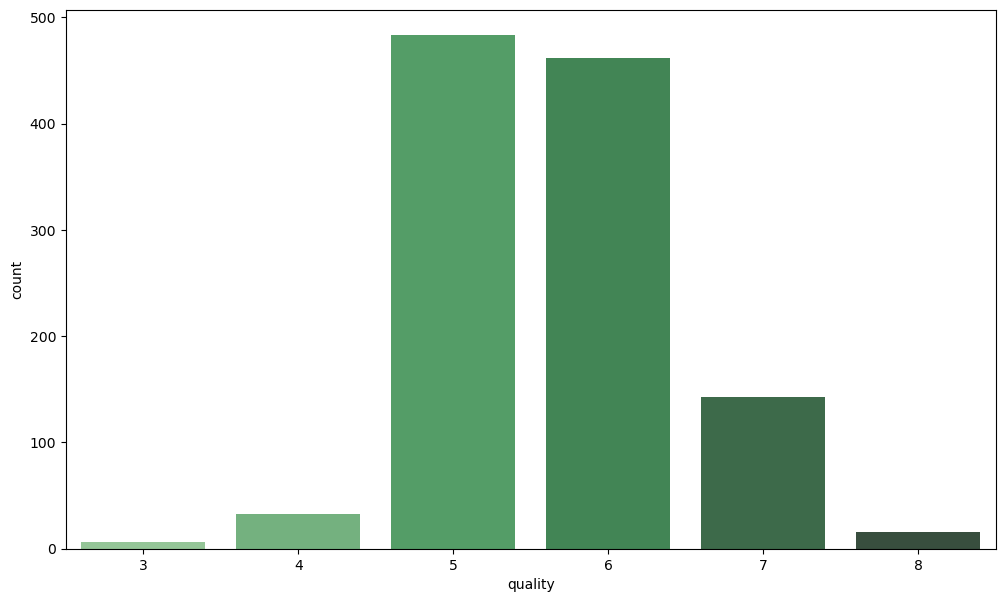

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(x='quality',data=data,palette='Greens_d')
plt.show()

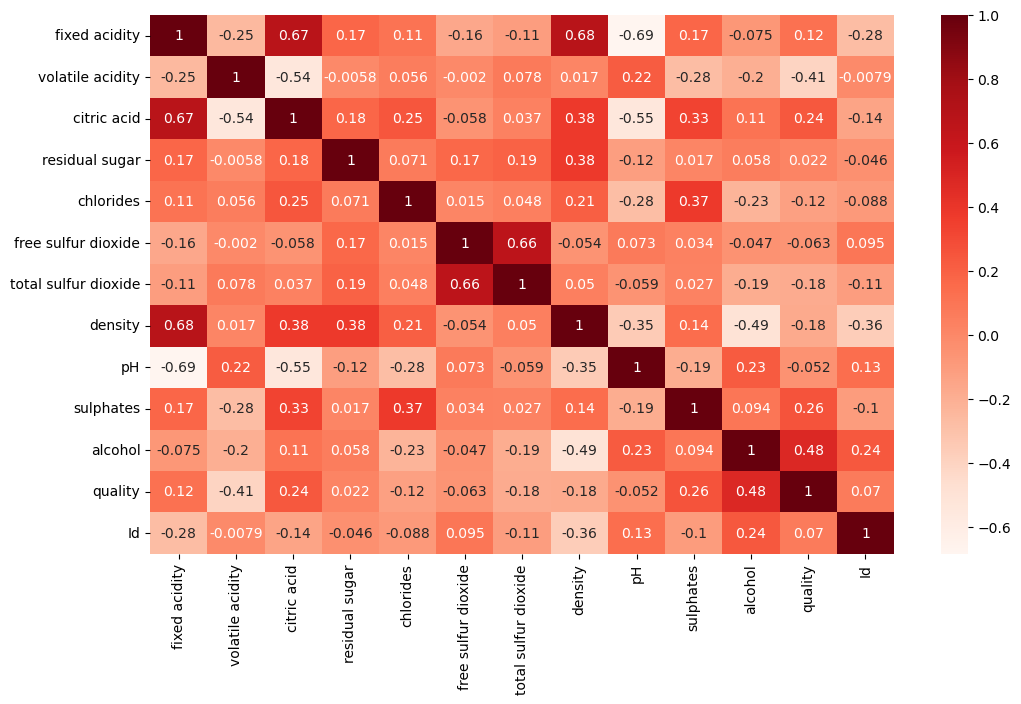

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='Reds')
plt.show()

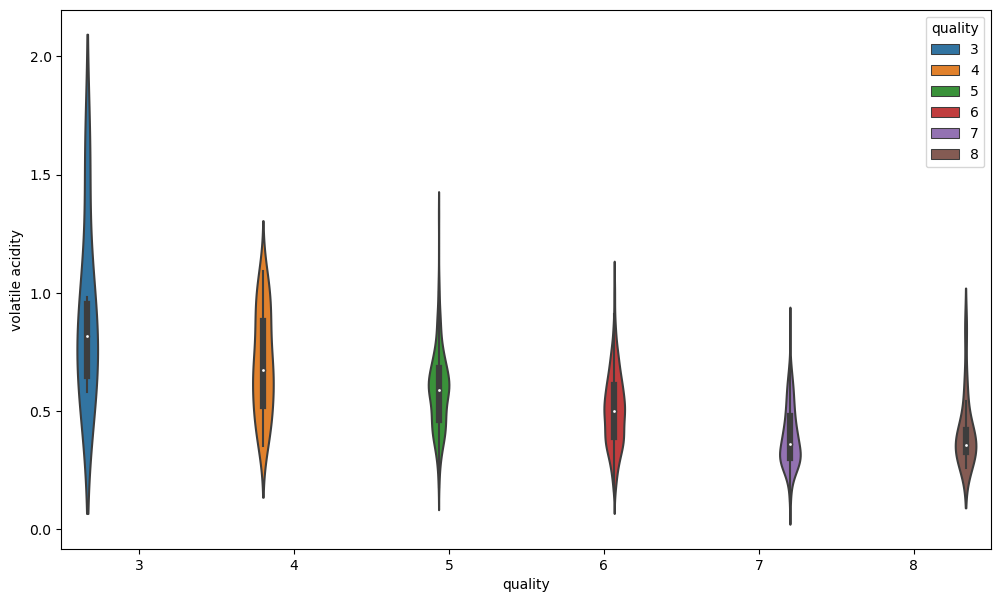

In [13]:
#below plot give information about how the quality changes with respect to volatile acidity
plt.figure(figsize=(12,7))
sns.violinplot(x='quality',y='volatile acidity',data=data,hue='quality')
plt.show()

<Axes: xlabel='density', ylabel='fixed acidity'>

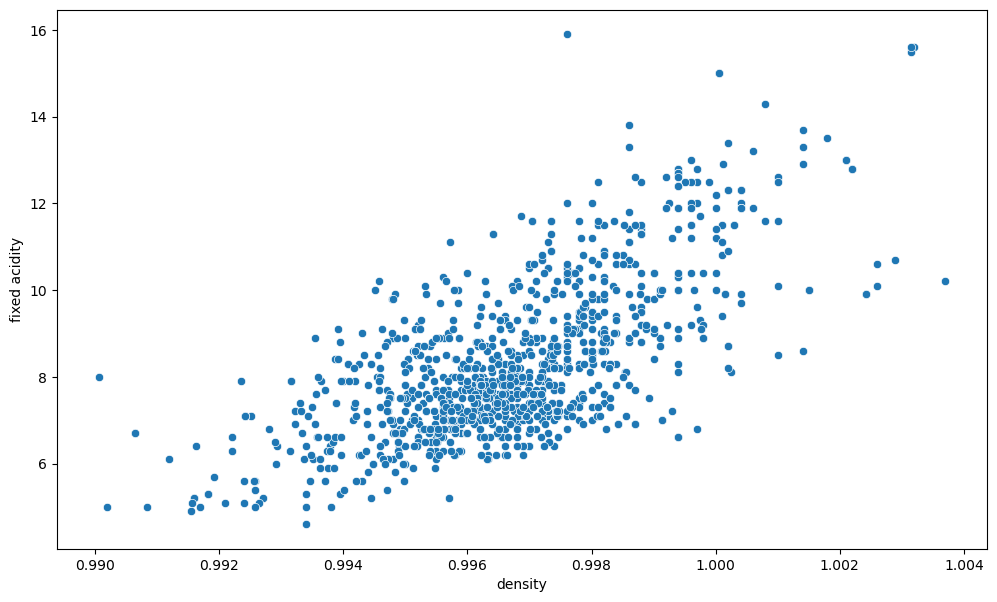

In [14]:
#below plot explains in detail about how the density of wine varies with the fixed acidity
plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='fixed acidity',data=data)

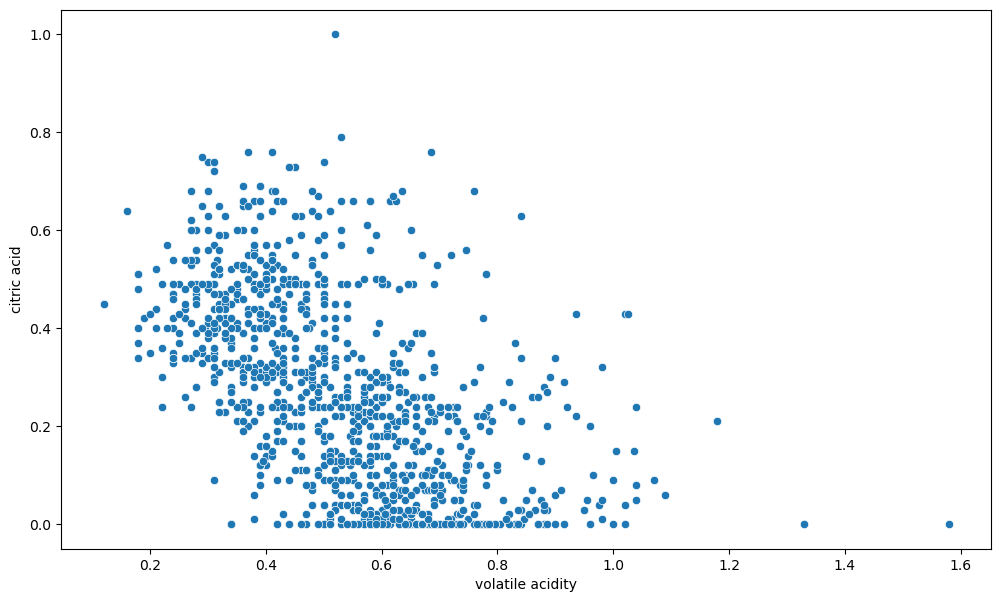

In [15]:
#Below plot explains about how volatile acidity of wine changes with respect to citric acid
plt.figure(figsize=(12,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=data)
plt.show()

# Feature selection

In [16]:
# Create Classification version of target variable
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]# Separate feature variables and target variable
X = data.drop(['quality','goodquality'], axis = 1)
Y = data['goodquality']

In [17]:
# See proportion of good vs bad wines
data['goodquality'].value_counts()

0    984
1    159
Name: goodquality, dtype: int64

# Models :

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,classification_report
model1 = GaussianNB()
model_comp = {}
model1.fit(X_train,Y_train)
Y_pred1 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print("accuracy score:",accuracy_score(Y_test,Y_pred1))
print("f1 score:",f1_score(Y_test,Y_pred1,average='weighted'))

model_comp['GaussianNB']=[accuracy_score(Y_pred1,Y_test),f1_score(Y_test,Y_pred1,average='weighted')]

accuracy score: 0.8483965014577259
f1 score: 0.8657380194781445


# Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dectclass=DecisionTreeClassifier()
dectclass.fit(X_train,Y_train)
y2=dectclass.predict(X_test)

print("accuracy score:",accuracy_score(Y_test,y2))
print("f1 score:",f1_score(Y_test,y2,average='weighted'))

model_comp['decision tree']=[accuracy_score(y2,Y_test),f1_score(Y_test,y2,average='weighted')]

accuracy score: 0.8658892128279884
f1 score: 0.8671211630395305


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
ranfoclass = RandomForestClassifier()
ranfoclass.fit(X_train, Y_train)
y3 = ranfoclass.predict(X_test)

print("accuracy score:",accuracy_score(Y_test,y3))
print("f1 score:",f1_score(Y_test,y3,average='weighted'))
print(classification_report(Y_test,y3))
model_comp['Random forest']=[accuracy_score(y3,Y_test),f1_score(Y_test,y3,average='weighted')]

accuracy score: 0.892128279883382
f1 score: 0.8810636483757442
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       298
           1       0.64      0.40      0.49        45

    accuracy                           0.89       343
   macro avg       0.78      0.68      0.72       343
weighted avg       0.88      0.89      0.88       343



# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(X_train,Y_train)
y4=k.predict(X_test)

print("accuracy score:",accuracy_score(Y_test,y4))
print("f1 score:",f1_score(Y_test,y4,average='weighted'))
print(classification_report(Y_test,y4))

model_comp['KNN']=[accuracy_score(y4,Y_test),f1_score(Y_test,y4,average='weighted')]

accuracy score: 0.8454810495626822
f1 score: 0.8271928568257063
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       298
           1       0.35      0.20      0.25        45

    accuracy                           0.85       343
   macro avg       0.62      0.57      0.58       343
weighted avg       0.82      0.85      0.83       343



# SVC

In [23]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
y4 = model.predict(X_test)
print("accuracy score:",accuracy_score(Y_test,y4))
print("f1 score:",f1_score(Y_test,y4,average='weighted'))
model_comp['SVC']=[accuracy_score(y3,Y_test),f1_score(Y_test,y3,average='weighted')]

accuracy score: 0.8688046647230321
f1 score: 0.8078121375583887


# Using Xg Boost

In [24]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))
print("f1 score:",f1_score(Y_test,y4,average='weighted'))
model_comp['Xg Boost']=[accuracy_score(y3,Y_test),f1_score(Y_test,y3,average='weighted')]

Accuracy Score: 0.8950437317784257
f1 score: 0.8078121375583887


In [25]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Greens')

,Accuracy,F1_score
KNN,0.845481,0.827193
GaussianNB,0.848397,0.865738
decision tree,0.865889,0.867121
Random forest,0.892128,0.881064
SVC,0.892128,0.881064
Xg Boost,0.892128,0.881064
